# Final Project - Basics of Mobile Robotics - Group 6


**Authors:**  Marine Moutarlier, Joao Pedro Rodrigues Lopes, Shujiro Shobayashi, Alessio Zazo


<img src="images/thymio_gd.png" width=600/> 

<img src="images/uber_eats.jpeg" width=400/>




# Table of Contents <a class="anchor" id="table"></a>

* [0. Introduction](#Introduction)
    * [0.0 Guidlines](#Guidelines)
    * [0.1. General overview of the code](#Overview)
    * [0.2. Setup of the map](#Setup)
    * [0.3. Essensial Library and inclusion](#Libraries)
    * [0.4. Important Classes](#Class)
        * [0.4.1 Robot Class](#Robot)
        * [0.4.2 PID Class](#PID)

* [1. Vision](#vision)
    * [1.1 Obstacle detection ](#obstacles)
    * [1.1. Goal detection](#Goal)
    * [1.2 Thymio detection and orientation ](#Thymio)
    * [1.3 Previous choices and why we avoided them ](#choice)




* [2. Global Navigation](#global_nav)
    * [2.1 Introduction](#PID)
    * [2.2 Pseudocode](#PID)
    * [2.3 Implementation](#PID)
    * [2.4 Example of visualization](#PID)

  
        
* [3. Motion Control](#motion)
    * [3.1 Development of the Simulation Environment](#PID)
        * [3.1.1 Simulated Robot Class](#PID)
        * [3.1.2 PID Controller for Orientation Control](#PID)
        * [3.1.3 Navigation of Robot in Simulation](#PID)
        * [3.1.4 PID Simulation](#PID)
    * [3.2 Robot Actuationt](#PID)
        * [3.2.1 Establishing Connection with Thymio](#PID)
        * [3.2.2 Robot Class with actuation](#PID)
        * [3.2.3 Navigate function with Actuation](#PID)
        * [3.2.4 PID with Actuation](#PID)

* [4. Kalman Filtering](Kalman)
     * [4.1 Kalman Filter Functions and Paramters](#PID)
        * [4.1.1 Kalman Filter Functions](#PID)
        * [4.1.2 Kalman Filter Equations](#PID)
     * [4.2 Kalman Filter Simulation](#PID)
         * [4.2.1 Navigating with Kalman Filter](#PID)


* [5. Local obstacle avoidance ](#local_avoidance)
   

* [6. Conclusion](#conclusion)



# 0. Introduction <a class="anchor" id="Introduction"></a>

In our project, we present an intelligent navigation system designed for the Thymio robot, integrating both global and local navigation strategies. The primary goal of our system is to ensure that the Thymio navigates from an arbitrary starting position to a set triangle target within an environment filled with static obstacles. What sets our project apart is the utilization of Kalman filtering techniques to provide the robot with an accurate position estimate, enabling precise control and efficient global navigation.

#### **Global Navigation**:
Our system enables the Thymio robot to autonomously plan and execute a path from any starting point to a user-defined target. The Thymio intelligently avoids static obstacles without relying on onboard sensors for detection. Instead, the robot's global navigation is orchestrated through an algorithm that strategically guides it around obstacles, from point to point to the target.

#### **Local Navigation**:
To enhance the robot's adaptability in real-time scenarios, we have incorporated local navigation capabilities. The Thymio dynamically responds to physical obstacles introduced into its path during navigation, employing local avoidance strategies. This ensures that the robot can effectively navigate through a dynamic environment.

#### **Kalman Filtering for Precision**:
Our navigation system lies in the application of Kalman filtering techniques to accurately estimate the Thymio robot's position. By fusing information from various sources and sensors, our system provides a reliable and continually updated estimate of the robot's location. This precision is crucial for effective global navigation, enabling the Thymio to follow planned paths with high accuracy and respond intelligently to changes in the environment.

#### **Real-Time Adaptability**:
Our project's versatility shines through in its ability to adapt to different scenarios and challenges. The Thymio robot seamlessly transitions between global and local navigation strategies. Additionally, the system's real-time adaptability ensures that the robot can navigate dynamically changing environments, making it suitable for a wide range of applications.

## 0.1. Overview of the code

<img src="images/diagram.png" width=800/>

Our code is separated into different parts. The main ones are the computer vision, the path planning, the motion control. In our code tthe motion control as our filtr as well as the local avoidance. All of these will be detailled more underneath 

## 0.2. Setup of the map 

Our robot is an Uber Eats driver (green), trying to deliver the food to its client, while following a gps on his phone. He is biking and there is an error between its position and where he is standing. The uber driver is taking the quickest path as he wants to get pay more by doing more deliveries. Some roads are blocked on its way, he needs to avoid them. He is also avoid his other team mate delivery uber eats driver as he does not want to waste more time. 

 <img src="images/ubereats.jpg" width=200/> <img src="images/shu2.png" width=635/> 

The set up of the map was difficult. We wanted to settle down for something that was easy to reproduce and that would not depend on a grid or on matrices. We wanted our robot to be able to navigate everywhere, in all situations and all form of environnement. We placed down a blue floor, which in reality is not necessary. 

The brightness also was a big struggle, because depending on where we were, the initial targets and thymio, depending on the color, would change. We had to adapt our thresholds every ttime and we lost a lot of time on that. If the Computer Vision was not completly reliable, then the path and motion were not and all of our projet was deficient. WE changeed the colors to shapes, to be less depend of the light allowing our projet to be more robust 

What is necessary:
 - For the obstacles to be black and in a rectangular shape, because thats how we decided to approximate them in our path planning. We also assumed that they would not be in a l shape as they would be approximated as one big rectangle. Details in the path planning section,
 - For the Thymio to have 2 circles on top of him, and for the smaller one to bee at the front, allowing us to orientation properly the thymio
 - For the goal to be in a triangular shape and well as in a different color than the backround, no need for a color specifically, we just need some contrast
 - To not have other triangular, circle or black items in our frame, as they would create false measurements 
 - The shape of the local obstacle, as we settled on an other thymio and tuned accordingly 


What can be changed:
- The colors of everything except the black obstacle
- The position of the obstacles, they can be put anywhere, the robot would avoid them, as long as he finds a path to the goal
- The position of the robot and the goal 
- When and where to put a local obstacle for the robot to avoid it

## 0.3. Essensial Library and inclusion

In [13]:
import cv2
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import time

from rrt import RRT
from search_space import SearchSpace
from plotting import Plot

## 0.4 Classes

### 0.4.1 Class Robot 

The Robot class is designed to simulate the robot's movement and orientation. With attributes representing the robot's position, orientation, and wheelbase, as well as methods for reorienting and moving the robot forward, the class encapsulates the basics that we use for the projeect. The decision to create a Robot class is motivated by the need for a modular and organized representation of the robot's behavior, making it easier to manage and extend its functionalities. By using a class, the code becomes more readable and adaptable, as well as easier to use in different fonctions

In [14]:
class Robot:
    
    def wait (self, orientation_control):
        """
        Waits for a duration based on the steering angle.
        """
        # Example: Linear relationship between steering angle and duration
        max_duration = 0.2
        duration = abs(orientation_control) * max_duration
        time_start = time.time()
        time.sleep(duration)
        time_end = time.time()
        
    def __init__(self, length=20.0, constant_speed=30.0):
        """
        Creates a robot and initializes location/orientation to 0, 0, 0.
        length : distance between the two wheels, also known as the wheelbase
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.i=0
        self.length = length
        self.constant_speed = constant_speed
        self.velocity_x = 0.0  # Initialize velocity in x direction
        self.velocity_y = 0.0  # Initialize velocity in y direction

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    
    def reorient(self, orientation_control, dt, max_speed=50):
        """
        Reorients the robot without moving it forward.
        """
        delta_orientation = orientation_control * dt

        self.orientation = (self.orientation + delta_orientation) % (2.0 * np.pi)
        
        rotation_speed = max_speed


        motor_speed_left = -rotation_speed if orientation_control > 0 else rotation_speed
        motor_speed_right = rotation_speed if orientation_control > 0 else -rotation_speed
        
        self.wait(orientation_control)
        self.i=self.i+1
        return motor_speed_left, motor_speed_right
        
        
    def move_forward(self, dt, max_speed=50):
        """
        Moves the robot forward without changing its orientation.
        """

        # Set both motors to the same speed
        motor_speed_left = motor_speed_right = max_speed

        # Calculate the distance to move based on the constant speed and the time step
        distance = self.constant_speed * dt

        # Update the robot's position
        self.x += distance * np.cos(self.orientation)
        self.y += distance * np.sin(self.orientation)

        # Update velocities based on constant speed
        self.velocity_x = self.constant_speed * np.cos(self.orientation)
        self.velocity_y = self.constant_speed * np.sin(self.orientation)        
        return motor_speed_left, motor_speed_right

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

        
        
    def move_forward(self, dt, max_speed=50):
        """
        Moves the robot forward without changing its orientation.
        """

        # Set both motors to the same speed
        motor_speed_left = motor_speed_right = max_speed

        # Calculate the distance to move based on the constant speed and the time step
        distance = self.constant_speed * dt

        # Update the robot's position
        self.x += distance * np.cos(self.orientation)
        self.y += distance * np.sin(self.orientation)

        # Update velocities based on constant speed
        self.velocity_x = self.constant_speed * np.cos(self.orientation)
        self.velocity_y = self.constant_speed * np.sin(self.orientation)        
        return motor_speed_left, motor_speed_right

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)


### 0.4.2 Class PID 

Following the same logic, we also created a PID Controller Class. 

The PIDController class is designed to implement a Proportional-Integral-Derivative (PID) controller for orientation control. It takes proportional (kp), integral (ki), and derivative (kd) gains as parameters during initialization. The class keeps the previous orientation error and integral of the orientation error to calculate the control output based on the current and target orientations. The update method computes the PID of the error and combines these components to produce the PID output for orientation control.  This organization promotes code readability, ease of maintenance, and the ability to customize PID parameters for different scenarios. We opted for a PID as I and D components could easily be put to 0 if we want only a P, or PI for example. Parameters were tuned accordingly in our code 

In [15]:
class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.previous_orientation_error = 0.0
        self.integral_orientation = 0.0

    def update(self, current_orientation, target_orientation, dt):
        """
        Updates the PID controller based on the current and target orientations.
        """
        # Calculate orientation error with wraparound handling at 360 degrees
        orientation_error = (target_orientation - current_orientation + np.pi) % (2 * np.pi) - np.pi

        # Accumulate the integral of the error
        self.integral_orientation += orientation_error * dt

        # Calculate the derivative of the error
        derivative_orientation = (orientation_error - self.previous_orientation_error) / dt

        # Update the previous error for the next iteration
        self.previous_orientation_error = orientation_error

        # PID output for orientation control
        orientation_output = self.kp * orientation_error + self.ki * self.integral_orientation + self.kd * derivative_orientation

        return orientation_output

# 1. Vision  <a class="anchor" id="Vision"></a>

Overwall view of the functions used in the ComputerVision part

| Function of Vision | Input | Output |
|:------|:------|:------|
|`def obstacle_detection(img)` |A frame as an argument, in which we apply a filter/mask that allows us to detect the black in the image |An image with a green countour around the obstacles and coordinates(x, y, width and height)|
|`def goal_dectetion(img)`|A frame as an argument, in which we apply a filter/mask that allows us to detect the triangle in the image |An image with a black countour around the goal and its center coordinnates|
|`def orientation_detection(img)`|A frame as an argument, in which we apply a mask that allows us to detect the circles in the image |An angle computed using the relative position and distances of the center of the robot|


## 1.1 Detection of the obstacles 


In this fonction, we compute the detection of the obstacles. To do this we store the image given in argument, we apply a gray mask ovre it for the black to come out better. We then apply a certain threshold for the black to be detected. We also apply a morphological operation to remove small as well as a filter. We then look for the countours in the image and we store them in a obstacle_position array. We use this array to storee the positions and then to draw the countours of the obstacles 

In [16]:
def obstacle_detection(img):
    """
    Detects the obstacles in the image using openCV functions
    :param img: image of the map with obstacles
    :return: contours_image (frame with the countoured images), obstacles_position (x, y, width and height )
    """
     
    # Convert the original image to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve thresholding accuracy
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Threshold the image to isolate the dark tape
    _, thresholded_image = cv2.threshold(blurred_image, 40, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations to remove small noise and emphasize the features
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Find contours in the processed image
    tape_contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to remove small noise
    filtered_contours = [cnt for cnt in tape_contours if cv2.contourArea(cnt) > 100]

    # Create a blank image to draw contours
    contours_image = img.copy()

    # Store the positions of obstacles
    obstacle_positions = []

    # Draw contours on the image and store bounding rectangles
    for cnt in filtered_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        obstacle_positions.append((x, y, x + w, y + h))
        cv2.drawContours(contours_image, [cnt], -1, (0, 255, 0), 3)  # Draw contours in green

    # Visualize the results
    plt.imshow(cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB), origin='lower')
    plt.title('Tape Contours Detected')
    plt.show()

    # Return the positions of obstacles and the image with contours drawn
    
    return contours_image, obstacle_positions

Exemple use on an image, in here it returns the x,y, width and height of the obstacles

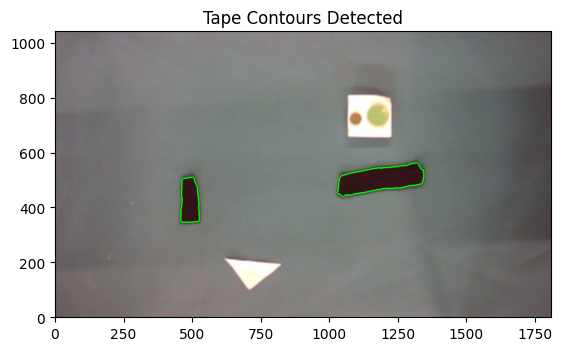

Obstacles x,y, width and heigth =  [(1026, 438, 1342, 563), (457, 345, 526, 510)]


In [17]:
# Example usage
image_path = 'images/envi.png'
image = cv2.imread(image_path)
contours_image, obstacle_positions = obstacle_detection(image)
print('Obstacles x,y, width and heigth = ',obstacle_positions)

## 1.2 Detection of the Goal

Similarly,in this fonction, we compute the detection of the Goal . To do this we store the image given in argument, we apply a gray mask over it for the white to come out better. We then apply a certain threshold for the white to be detected. We also apply a morphological operation to remove small as well as a filter. We then look for the countours in the image and we store them in a Thymio_position array. Then we compute the average 

In [18]:
def goal_detect(img):
    # Read the input image

    # Apply bilateral filter
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)

    # Convert to grayscale
    bw_img = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

    # Thresholding
    ret, th1 = cv2.threshold(bw_img, 165, 220, cv2.THRESH_BINARY)
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # List to store triangle coordinates
    triangle_coordinates = []

    goal=img.copy()

    # Iterate through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the polygon has 3 vertices, it's a triangle
        if len(approx) == 3:
            triangle_coordinates.append(approx)

            # Draw the triangle on the original image
            cv2.drawContours(goal, [approx], 0, (0, 0, 250), 4) # display the goal in red

      # Visualize the results
    plt.imshow(cv2.cvtColor(goal, cv2.COLOR_BGR2RGB), origin='lower')
    plt.title('Tape Contours Detected')
    plt.show()        

    # Print the coordinates of the triangles
    for i, triangle in enumerate(triangle_coordinates):
    
        # Extract homogeneous coordinates
        x_coords = triangle[:, 0, 0]
        y_coords = triangle[:, 0, 1]
        
        # Compute average point
        mean_x = np.mean(x_coords)
        mean_y = np.mean(y_coords)
        return (mean_x, mean_y)


Example of usage 

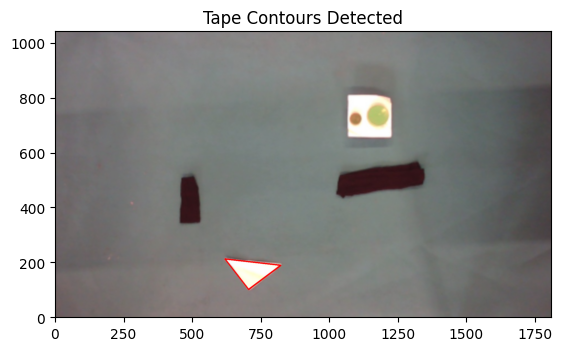

Detected Triangles: (714.3333333333334, 166.33333333333334)


In [19]:
# Example usage
image2 = cv2.imread("images/envi.png")
triangles = goal_detect(image2)
print("Detected Triangles:", triangles)

# 1.4 Position and Orientation of the robot 

## 1.4.1 Hough Circles 

At first, we used for the computeation of the Thymio, the white threshold. To do this we stored the image given in argument, we applied a gray mask over it for the white to come out better. We then applied a certain threshold for the white to be detected. We also applied a morphological operation to remove small as well as a filter. We then looked for the countours in the image and we store them in a Thymio_position array. Then we computed the average position. But after discussion and since we needed to compute the orienatation of the robot, we decided to drop this method and opt for the Hough Circles instead. This would allow us to detect the orientation and the position of the robot.
Hough Circles are reliable for circle detection in computer vision when parameters are appropriately tuned, and images are preprocessed to handle noise and enhance features. Its reliability is influenced by factors such as image quality, circle parameters, and computational cost. Parameter tuning and adaptive techniques can improve performance, making Hough Circles a versatile tool for various applications with circular object detection. This would allow us to not depend on the lightening of the room.

<img src="images/Hough Circle.png" width=400/>

## 1.4.2 Orientation of the robot 

### 1.4.2.1 Theory 

This was one of our main difficult function to compute as we tried many different methods

<img src="images/orientation thymio.png" width=400/>


We went through this 8 different conditions to compute the orientation of the robot. The provided Python function, orientation_detection, utilizes OpenCV to determine the orientation of a robot within an input image of a map. The process involves converting the image to grayscale, applying GaussianBlur for noise reduction, and using HoughCircles to detect circular shapes. The function then identifies two circles, assumed to represent the robot's small and large features. The orientation angle of the robot is calculated based on the relative positions of these circles. The function considers different cases to handle various orientations, such as when the small circle is to the left, right, above, or below the large circle. The calculated angle is printed for debugging purposes, and the final result is returned. If no circles are detected in the image, the function returns None.

### 1.4.2.2 Fonction and Tuning 

- **dp=1:** No subsampling, original image resolution.
- **minDist=20:** Minimum distance between circle centers.
- **param1=25:** Higher Canny edge detector threshold.
- **param2=25:** Lower threshold for circle center detection.
- **minRadius=10:** Minimum circle radius.
- **maxRadius=50:** Maximum circle radius.

These choices aim to balance sensitivity and specificity for detecting smaller, closely spaced circles in our specific use case. Adjustments may be needed based on the characteristics of the image, such as the camera proximity or brightness.


In [20]:
def orientation_detection(image):
    """
    Detects the orientation of the robot in the image using openCV functions
    :param img: image of the map  
    :return: the angle of orientation of the robot 
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use HoughCircles to detect circles with adjusted parameters
    circles = cv2.HoughCircles(
        blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1, 
        minDist=20,  # Decreased minDist to detect closely located circles
        param1=25, 
        param2=25,  # Decreased param2 for better sensitivity to smaller circles
        minRadius=10,  # Adjusted minRadius for smaller circles
        maxRadius=50  # Adjusted maxRadius for smaller circles
    )
    
    # If circles are found, extract their positions
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        # Sort circles by radius to identify the small and large circles
        circles = sorted(circles[0, :], key=lambda x: x[2])
        
        # Extract the positions of the small and large circles
        small_circle = (circles[0][0], circles[0][1])
        large_circle = (circles[1][0], circles[1][1])

        # Draw circles on the image
        cv2.circle(image, (small_circle[0], small_circle[1]), circles[0][2], (150, 0, 0), 5)  # Small circle in Blue
        cv2.circle(image, (large_circle[0], large_circle[1]), circles[1][2], (0, 150, 0), 5)  # Large circle in Green

        # Display the image with circles
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Circles Detected')
        plt.show()
        
    
     ## case 1 
        if ((small_circle[0]> large_circle[0]) & (small_circle[1]> large_circle[1])):
            angle=np.degrees(np.arctan((small_circle[1]-large_circle[1])/(small_circle[0]-large_circle[0])))
        
    ## case 2
        if ((small_circle[0]< large_circle[0]) & (small_circle[1]> large_circle[1])):
            angle=np.degrees(np.arctan((small_circle[1]-large_circle[1])/(large_circle[0]-small_circle[0])))
            angle= 180-angle
    
    ## case 3
        if ((small_circle[0]< large_circle[0]) & (small_circle[1]<large_circle[1])):
            angle=np.degrees(np.arctan((large_circle[1]-small_circle[1])/(large_circle[0]-small_circle[0])))
            angle= 180+angle

       
    ## case 4
        if ((small_circle[0] >large_circle[0]) & (small_circle[1]<large_circle[1])):
            angle=np.degrees(np.arctan((small_circle[0]-large_circle[0])/(large_circle[1]-small_circle[1])))
            angle= 270+angle

    ## case 5 
        if ((small_circle[0]==large_circle[0]) & (small_circle[1]>large_circle[1])):
            angle=90
        
     ## case 6
        if ((small_circle[0]==large_circle[0]) & (small_circle[1]<large_circle[1])):
            angle=270

     ## case 7
        if ((small_circle[1]==large_circle[1]) & (small_circle[0]>large_circle[0])):
            angle=0 

    ## case 8
        if ((small_circle[1]==large_circle[1]) & (small_circle[0]<large_circle[0])):
            angle=180 

        print("Small circle center = ", small_circle)
        print("Big circle center = ", large_circle)   
        
        return angle
    else:
        return None 

Example usage 

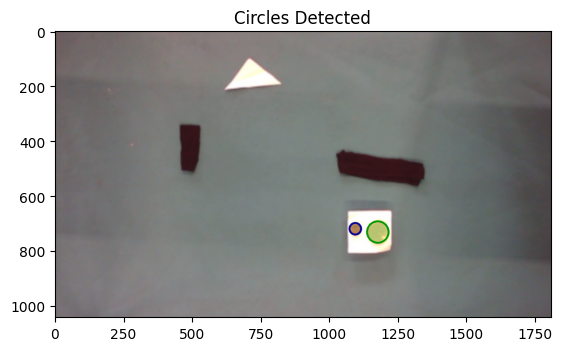

Small circle center =  (1092, 720)
Big circle center =  (1174, 732)
Orientation of the Thymio (deg) 188.32565033042684


In [21]:
# Example usage
image3 = cv2.imread("images/envi.png")
thymio= orientation_detection(image3)
print("Orientation of the Thymio (deg)", thymio)

# 2. Global navigation  <a class="anchor" id="GlobalNav"></a>

## 2.1 Introduction

The global navigation algorithm is an application of the Rapidly-exploring Random Tree (RRT) algorithm, which is often used in problems related to path planning and exploration in complex environments. Developed by Steven M. LaValle in the late 1990s, the RRT algorithm is particularly well-suited for high-dimensional spaces and environments with obstacles. The flexibility and reliability of the RRT makes it a popular choice in robotic motion planning, video game character movement, and autonomous vehicle navigation

The core idea is to iteratively build a tree structure where each node in the tree represents a valid configuration within the search space. The tree is incrementally grown by randomly sampling new configurations and connecting them to the existing tree structure.  As the algorithm progresses, the tree rapidly explores the state space, seeking a path from an initial configuration to a goal configuration.

With each added node the tree has a certain chance of checking if the goal configuration can be connected to the nearest node in the tree. If so, a feasible path has been found.

## 2.2 Pseudocode

Here a pseudocode of how the RRT path planning works 

```text
Initialization
    Define map limits, obstacles coordinates, x_init, x_goal. 
    Append x_init to the tree.
while(x_goal is not connected):
    Always: 
        Find a new point x_new in the map that is not inside an obstacle.
        Try to connect x_new with the nearest point already in the tree.
        If the connection does not intersect an obstacle (== is valid):
            Append x_new to the tree.
    (10% chances to) or (at max samples) :
        If x_goal can be connected to the nearest point in the tree. 
            Connect goal.
Reconstruct path by following tree branches.
return path

## 2.3 Implementation

The code is an adaptation from the [RRT Motion Planning library](https://github.com/motion-planning/rrt-algorithms) from users Szlango and tahsinkose [1]. <br>
The algorithm is exported and executed through RRT2D.py.
| RRT2D.py | Input | Output |
|:-|:-------------|:---|
| `def RRT_PlanPath(...)` | Map limits <br> Obstacles coordinates <br> Initial position <br> Thymio Radius <br> Goal position |The shortest path as an array containing  a succession of waypoints.|

| Classes of Global navigation | Description |Key Functions |
|:---|:------|:------|
|`RRT` | 1. Coordinates other path planning classes to generate a viable path from x_init to x_goal, inside  search space X.   <br><br> 2. Removes unnecessary waypoints from the path. |   <span style="color: rgb(255, 80, 80);">  def rrt_search(self) : </span> Returns a path from x_init to x_goal inside the search space. After max_samples iterations, if no path is found return None. <br> <br>  `def trim_path(self, path):` : For all intermediate waypoints N, this function checks if a direct connection can be made from N-1 to N+1 without intersecting obstacles. If so, N is deleted from the path. <br> Returns the shortened path _trimmed_path_<br>|
|`SearchSpace` | Initializes a map within the bounds specified by user. Keeps track of obstacles populating the map inside a list.|   `def obstacle_free(x)` : Returns true if point x is not inside an obstacle <br> `def sample_free()` : Returns a point x that is within map bounds and not inside an obstacle. <br> `def collision_free(start,end,r)` : Returns true if a line can be traced from start point to end point without interesecting an obstacle. r is line resolution |
|`RRTBase` | Provide the essential functions the RRT algorithm needs to operate.|  `def new_and_near(self, tree, q)` Returns a new <span style="color: rgb(255, 80, 80);"> random </span> point not inside an obstacle and the point in the tree that is placed closest to it.<br> <br>   `    def connect_to_point(self, tree, x_a, x_b):` : If x_a in tree can be connected to x_b without intersecting obstacles, append x_b to the tree.  <br> <br> `def can_connect_to_goal(self, tree)` : Returns true if there is a valid connection from the goal to the nearest point already in the tree.  <br> <br>    `def reconstruct_path(self, tree, x_init, x_goal):` If N is the current point, _self.trees[tree].E[N]_ returns its parent node N-1. This function starts from x_goal  and iterates through all linkages until x_init.  <br>  Returns a path composed of all waypoints. <br> <br> |


## 2.4 Example of visualization

In [23]:
####  Example tree with default values :
from RRT2D import RRT_PlanPath

mapDefault = np.array([(0, 852), (0, 1280)])
obsDefault = np.array([(213, 539, 817, 597), (440, 373, 495, 498), (1081, 253, 1142, 852), (254, 10, 676, 64)])
initDefault = (800 ,1000)
goalDefault = (270, 300)
ThymioRadius=30


RRT_PlanPath()

[213 539 817 597]
[440 373 495 498]
[1081  253 1142  852]
[254  10 676  64]
Checking if can connect to goal at 17 samples
Could not connect to goal
Checking if can connect to goal at 151 samples
Could not connect to goal
Checking if can connect to goal at 191 samples
Could not connect to goal
Checking if can connect to goal at 211 samples
Could not connect to goal
Checking if can connect to goal at 239 samples
Could not connect to goal
Checking if can connect to goal at 249 samples
Could not connect to goal
Checking if can connect to goal at 267 samples
Could not connect to goal
Checking if can connect to goal at 309 samples
Could not connect to goal
Checking if can connect to goal at 323 samples
Could not connect to goal
Checking if can connect to goal at 347 samples
Could not connect to goal
Checking if can connect to goal at 363 samples
Could not connect to goal
Checking if can connect to goal at 367 samples
Could not connect to goal
Checking if can connect to goal at 395 samples
Co

(<search_space.SearchSpace at 0x1300a0310>,
 [(800, 1000),
  (161.2592163428728, 673.2115823670131),
  (146.1824861772922, 513.0658287042287),
  (270, 300)],
 array([[ 213,  539,  817,  597],
        [ 440,  373,  495,  498],
        [1081,  253, 1142,  852],
        [ 254,   10,  676,   64]]),
 array([[ 163,  489,  867,  647],
        [ 390,  323,  545,  548],
        [1031,  203, 1192,  902],
        [ 204,  -40,  726,  114]]),
 array([[   0,  852],
        [   0, 1280]]))

The thymio is modelled as a circle with center (x,y)_t and radius R_t, which is estimated to be R_t =~200px. To avoid collision, the algorithm finds a path for the thmyio center in a space where all obstacles have been inflated by R_t. If the center does not intersects x_obs + R_t, then its perimeter does not intersect x_obs.

The path obtained from the algorithm is trimmed by removing unnecessary intermediate waypoints. 

**References**

[1] `RRT Motion Planning library :` https://github.com/motion-planning/<br>
`Rapidly exploring random tree wikipedia :` https://en.wikipedia.org/wiki/Rapidly_exploring_random_tree<br>

# 3. Motion control ( PID Controller and Kalman Filter)

In this segment of our project, we go into the details of motion control, essential in realizing our objective of enabling a Thymio robot to autonomously navigate towards a goal while circumventing obstacles. This section outlines the mechanisms and algorithms we implemented to translate the visual data acquired through computer vision into precise and adaptive movement commands for the robot.

## 3.1 Development of the Simulation Environment


To test and refine the motion control algorithms for our Thymio robot, we had to create a robust simulation environment. This simulated setting provided us with a controlled and flexible platform to experiment with various scenarios and parameters without the physical constraints and risks associated with real-world testing. It also allowed us to work on our motion control even when the computer vision and path planning algorithms were still being developped. 

### 3.1.1 Simulated Robot Class

We first had to developp a robot class in order to encapsulate the fundamental attributes and functionalities needed to simulate the motion control dynamics of the robot.

In [24]:
class SimRobot:
    def __init__(self, constant_speed=30.0):
        """
        Creates a robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.constant_speed = constant_speed
        self.velocity_x = 0.0  
        self.velocity_y = 0.0  

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def reorient(self, orientation_control, dt):
        """
        Reorients the robot to a new orientation based on the control signal.
        """
        # Calculate the change in orientation
        delta_orientation = orientation_control * dt

        # Update the robot's orientation
        self.orientation = (self.orientation + delta_orientation) % (2.0 * np.pi)


    def move_forward(self, dt):
        """
        Moves the robot forward in the direction of its current orientation.
        """
        # Calculate the distance to move based on the constant speed and the time step
        distance = self.constant_speed * dt

        # Update the robot's position
        self.x += distance * np.cos(self.orientation)
        self.y += distance * np.sin(self.orientation)

        # Update velocities based on constant speed
        self.velocity_x = self.constant_speed * np.cos(self.orientation)
        self.velocity_y = self.constant_speed * np.sin(self.orientation)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f velocity_x=%.5f velocity_y=%.5f]' % (self.x, self.y, self.orientation, self.velocity_x, self.velocity_y)


This class serves several functions:

- **Initialization**: The constructor (`__init__`) initializes the robot with default parameters, such as length, speed, and starting position and orientation.

- **Position Setting**: The `set` method allows for the explicit positioning and orientation of the robot within the simulation space, for setting up various test scenarios.

- **Orientation Adjustment**: Through the `reorient` method, the robot can adjust its orientation based on the control signal, a key aspect of navigating and avoiding obstacles.

- **Forward Movement**: The `move_forward` method propels the robot in the direction of its current orientation, mimicking the real-life movement of the Thymio robot.

- **State Representation**: The `__repr__` method provides a convenient way to output the current state of the robot, including its position, orientation, and velocity.

##### **Constant Speed Movement**

One of the fundamental design decisions in our robot's motion control system is the implementation of constant speed movement. This choice significantly simplifies the control mechanisms and enhances the predictability of the robot's behavior, which is crucial for effective navigation and obstacle avoidance.

##### **Facilitating Control**
Maintaining a constant speed reduces the complexity of the control algorithms. Without the need to constantly adjust the speed, our focus shifts to direction control, primarily managing the robot's orientation (`theta`). This simplification allows for a more straightforward and reliable control system, especially in dynamic environments where rapid and accurate responses are essential. Throughout our project we tried many times controlling the speed and even managed to make it work by simulation however when we had to implement it on our thymio it became evident that the code was too complex and not robust enough to garantee a smooth path to the goal. 

##### **Simplifying Data Filtering**
Another advantage of constant speed movement lies in the ease of data filtering and processing. With a uniform speed, the predictive models and filters (like Kalman filters) used in our system can operate under consistent conditions, improving their accuracy and efficiency. This uniformity aids in effectively predicting the robot's future state, essential for planning and adjusting its path in real-time.

##### **Robot's State Definition**
The state of our robot is defined by three variables:

- `x`: The robot's position on the x-axis.
- `y`: The robot's position on the y-axis.
- `theta`: The robot's orientation angle.

These state variables (`x`, `y`, and `theta`) are central to our control algorithms and are continuously monitored and updated based on the robot's interactions with its environment. By keeping track of these variables, we can accurately control the robot's trajectory, ensuring it moves efficiently towards its goal while avoiding obstacles.

### 3.1.2 PID Controller for Orientation Control

In our project, we implemented a `PIDController` class to manage the orientation control of the Thymio robot. This approach was chosen for its efficiency and effectiveness in achieving precise control, particularly in the dynamic environments we were simulating.

In [25]:
import numpy as np

class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.previous_orientation_error = 0.0
        self.integral_orientation = 0.0

    def update(self, current_orientation, target_orientation, dt):
        """
        Updates the PID controller based on the current and target orientations.
        """
        # Calculate orientation error with wraparound handling at 360 degrees
        orientation_error = (target_orientation - current_orientation + np.pi) % (2 * np.pi) - np.pi

        # Accumulate the integral of the error
        self.integral_orientation += orientation_error * dt

        # Calculate the derivative of the error
        derivative_orientation = (orientation_error - self.previous_orientation_error) / dt

        # Update the previous error for the next iteration
        self.previous_orientation_error = orientation_error

        # PID output for orientation control
        orientation_output = self.kp * orientation_error + self.ki * self.integral_orientation + self.kd * derivative_orientation

        return orientation_output


##### **PID Controller for Orientation Control**

The `PIDController` class uses PID (Proportional-Integral-Derivative) control, a widely recognized method in control theory. It adjusts the robot's orientation based on three factors:

- **Proportional (P)**: The immediate error between the current and target orientations.
- **Integral (I)**: The accumulation of past errors, addressing any continuous offset.
- **Derivative (D)**: The rate of change of the error, predicting future trends.

##### **Rationale for Focusing on Orientation Control**

We chose to control only the robot's orientation (`theta`) for several reasons:

- **Reducing Complexity**: Direct control of the `x` and `y` positions would be redundant due to their dependence on the robot's orientation and constant speed. The positional updates can be represented as follows:

  \( x_{\text{new}} = x_{\text{old}} + v \cdot \cos(\theta) \cdot dt \)
  
  \( y_{\text{new}} = y_{\text{old}} + v \cdot \sin(\theta) \cdot dt \)

  Here, `v` is the constant speed, and `dt` is the time increment. By controlling `theta`, we indirectly guide the `x` and `y` positions.

- **Streamlining Control**: Focusing on orientation simplifies the control system, making it more manageable and efficient, especially in environments with variable obstacles and paths.

##### **Implementation and Optimization of the PID Controller**

Our implementation journey involved:

- **Initial Focus on Proportional Control**: In early testing phases, we primarily relied on the proportional component (P) for simplicity.
- **Fine-Tuning Integral and Derivative Components**: We iteratively adjusted the integral (I) and derivative (D) parameters to balance precision and stability. This tuning process was essential for ensuring that the robot could effectively navigate in real-world scenarios.


By implementing the `PIDController` class and focusing on orientation control, we developed a robust and efficient system for guiding the Thymio robot. This approach allowed us to manage the robot's movement effectively, demonstrating the power of PID control in robotic navigation.


## 3.1.3 Navigation of Robot in Simulation

The `navigate_robot_with_pid` function plays an important role in our robot's navigation system, employing a PID controller to steer the robot towards a specified target. This section explains the function's mechanics and the rationale behind its structural decisions, particularly the distinction between orientation adjustment and forward movement.

In [26]:
def sim_navigate_robot_with_pid(robot, orientation_pid, target, dt, n_steps):
    actual_trajectory = [[robot.x, robot.y]]
    target_position = np.array(target)

    # Define thresholds
    orientation_threshold = np.radians(1)  # Orientation threshold for facing the target
    distance_threshold = 5.0  # Distance to target to consider as reached

    for step in range(n_steps):
        # Calculate the angle to the target
        angle_to_target = np.arctan2(target_position[1] - robot.y, target_position[0] - robot.x)
        
        # Update the PID controller for orientation
        orientation_control = orientation_pid.update(robot.orientation, angle_to_target, dt)
        
        # Calculate the orientation difference
        orientation_difference = (angle_to_target - robot.orientation + np.pi) % (2 * np.pi) - np.pi
        
        # Decide whether to move forward or reorient
        if abs(orientation_difference) < orientation_threshold:
            robot.move_forward(dt)
        else: 
            robot.reorient(orientation_control, dt)
        
        # Add the actual position to the trajectory
        actual_trajectory.append([robot.x, robot.y])

        # Check if the target is reached
        if np.linalg.norm(target_position - np.array([robot.x, robot.y])) < distance_threshold:
            print(f"Reached target in {step} steps.")
            break

    return np.array(actual_trajectory)

##### **Function Overview**

The `navigate_robot_with_pid` function is crafted to guide a robot to a designated target location using orientation control via a PID controller. It requires several inputs:
- **Robot Object**: The instance of the robot being controlled.
- **PID Controller Instance**: Manages the robot's orientation.
- **Target Coordinates**: The destination the robot aims to reach.
- **Time Step (`dt`)**: The interval at which the robot updates its state.
- **Number of Steps (`n_steps`)**: The maximum iterations for reaching the target.

#### Key Design Choices

##### **Separation of Orientation and Movement**

- **Simplified Motion Logic**: By dividing orientation adjustment and forward movement into separate actions, we simplify the control logic. This separation allows the robot to focus on one aspect of movement at a time, reducing the complexity of simultaneous control of orientation and position.

- **Enhanced Precision**: Orienting the robot correctly before moving forward ensures greater accuracy in trajectory. It minimizes the likelihood of veering off course, a common issue when orientation and movement are intertwined.

- **Error Reduction**: This approach aids in reducing cumulative errors. By first aligning the robot accurately with the target, we mitigate the errors that can amplify over distance if the robot begins moving with an incorrect orientation.

##### **Function Mechanics**

1. **Orientation Control**: The PID controller adjusts the robot's orientation to align it with the target. This alignment is crucial for ensuring that the robot moves directly towards the target when it starts moving forward.

2. **Decision Making**: The function decides whether to reorient or move forward based on the current orientation's alignment with the target. If the orientation is within an acceptable threshold, the robot moves forward; otherwise, it adjusts its orientation.

3. **Trajectory Recording**: The robot's position is recorded at each step, providing a detailed trajectory of its path towards the target.


The `navigate_robot_with_pid` function embodies a strategic approach to robotic navigation, emphasizing precision and error reduction. The clear separation of orientation control and forward movement underpins the function's effectiveness, showcasing the robustness of PID control in autonomous navigation.

## 3.1.4 PID Simulation

The main loop function in our robot control simulation serves as a testbed to evaluate and refine our robot's navigation capabilities under PID control. It simulates the robot's journey towards designated targets, providing insights into the effectiveness of our control algorithms. It allows us to check what a change in a certain parameter such as 'dt' or 'n_steps' would do to our Robot. 

Reached target in 82 steps.
Reached target in 89 steps.


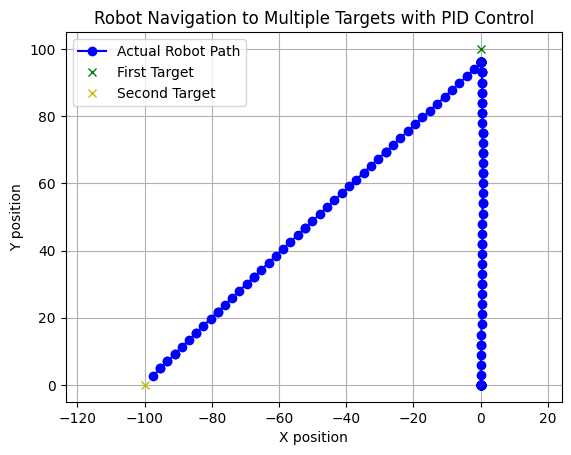

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the robot and set the targets
robot1 = SimRobot()
first_target = [0, 100]
second_target = [-100, 0]

# PID parameters for orientation
kp, ki, kd = 1, 0.01, 0.01

# Create the PID controller for orientation
orientation_pid = PIDController(kp, ki, kd)

# Define the parameters
dt = 0.1  # Time step
n_steps = 600  # Number of steps

# Navigate to the first target
actual_trajectory1 = sim_navigate_robot_with_pid(robot1, orientation_pid, first_target, dt, n_steps)

# Navigate to the second target
actual_trajectory2 = sim_navigate_robot_with_pid(robot1, orientation_pid, second_target, dt, n_steps)

# Combine the trajectories for plotting
combined_actual_trajectory = np.vstack((actual_trajectory1, actual_trajectory2))

# Plotting the combined trajectory
plt.plot(combined_actual_trajectory[:, 0], combined_actual_trajectory[:, 1], 'bo-', label="Actual Robot Path")
plt.plot(first_target[0], first_target[1], 'gx', label="First Target")
plt.plot(second_target[0], second_target[1], 'yx', label="Second Target")
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Robot Navigation to Multiple Targets with PID Control')
plt.legend()
plt.axis('equal')
plt.grid(True)

plt.show()

##### **Function Structure**

The main loop is structured to perform the following steps:

1. **Initialize the Robot and PID Controller**: The robot is instantiated, and the PID controller is initialized with appropriate `kp`, `ki`, and `kd` values.

2. **Define Targets**: Set target points that the robot should navigate to.

3. **Run the Navigation Function**: Use the `navigate_robot_with_pid` function to move the robot towards each target.

4. **Record and Analyze Trajectories**: The function records the robot's trajectory, enabling analysis of its path efficiency and accuracy.


## 3.2 Robot Actuation

Now that we have been able to test our motion control algorithm in simulations we have to see how our motion control algorithm behaves in real life. In order to do so we had to make some modifications in our `Robot` class, `navigate_robot_with_pid` function and `main` loop.

### 3.2.1 Establishing Connection with Thymio

In [ ]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [ ]:
await tdmclient.notebook.stop()

In [ ]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

In [ ]:
motor_left_target= 0
motor_right_target= 0

In [ ]:
@tdmclient.notebook.sync_var

def custom_wait(duration_ms):
    start_time = time.time() * 1000  # Convert current time to milliseconds
    while (time.time() * 1000 - start_time) < duration_ms:
        pass  # Do nothing and wait

The `motors_course` function is an asynchronous utility designed to control the motor speeds of a Thymio robot.

In [ ]:
async def motors_course(l_speed=100, r_speed=100, verbose=False):
    """
    Sets the motor speeds of the Thymio 
    param l_speed: left motor speed
    param r_speed: right motor speed
    param verbose: whether to print status messages or not
    """
   
    return {
        "motor.left.target": [l_speed], 
        "motor.right.target": [r_speed],
    }

### 3.2.2 Robot Class with actuation

The revised `Robot` class in our project represents an advanced step in controlling the Thymio robot. This class not only maintains the robot's position and orientation but also integrates motor control to simulate real-world actuation.

In [ ]:
import time

class Robot:
    
    def wait (self, orientation_control):
        """
        Waits for a duration based on the steering angle.
        """
        # Example: Linear relationship between steering angle and duration
        max_duration = 0.2
        duration = abs(orientation_control) * max_duration
        time_start = time.time()
        time.sleep(duration)
        time_end = time.time()
        
    def __init__(self,constant_speed=30.0):
        """
        Creates a robot and initializes location/orientation to 0, 0, 0.
        length : distance between the two wheels, also known as the wheelbase
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.constant_speed = constant_speed
        self.velocity_x = 0.0  
        self.velocity_y = 0.0  

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    
    def reorient(self, orientation_control, dt, max_speed=50):
        """
        Reorients the robot without moving it forward.
        """
        delta_orientation = orientation_control * dt

        self.orientation = (self.orientation + delta_orientation) % (2.0 * np.pi)
        
        rotation_speed = max_speed
        motor_speed_left = -rotation_speed if orientation_control > 0 else rotation_speed
        motor_speed_right = rotation_speed if orientation_control > 0 else -rotation_speed
        

        return motor_speed_left, motor_speed_right
        
        
    def move_forward(self, dt, max_speed=50):
        """
        Moves the robot forward without changing its orientation.
        """

        # Set both motors to the same speed
        motor_speed_left = motor_speed_right = max_speed

        # Calculate the distance to move based on the constant speed and the time step
        distance = self.constant_speed * dt

        # Update the robot's position
        self.x += distance * np.cos(self.orientation)
        self.y += distance * np.sin(self.orientation)

        # Update velocities based on constant speed
        self.velocity_x = self.constant_speed * np.cos(self.orientation)
        self.velocity_y = self.constant_speed * np.sin(self.orientation)        
        return motor_speed_left, motor_speed_right

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

- **Motor Speed Control**: In both `reorient` and `move_forward` methods, motor speeds are set to simulate the robot's movement:
  - **During Reorientation**: The motors are set to rotate in opposite directions, creating a pivoting motion. The speed is determined by a `max_speed` parameter and the direction of rotation depends on the orientation control signal.
  - **During Forward Movement**: Both motors are set to the same speed, driving the robot straight ahead.

- **Waiting Mechanism (`wait`)**: Introduces a delay based on the steering angle. This simulates the time it takes for the robot to adjust its orientation in real-world scenarios.

### 3.2.3 Navigate function with Actuation

The revised `navigate_robot_with_pid` incorporates real-time motor actuation to control the Thymio robot. This function now integrates direct control commands to the robot's motors, aligning the simulated navigation with actual movements.

In [28]:
async def navigate_robot_with_pid(robot, orientation_pid, target, dt):
    actual_trajectory = [[robot.x, robot.y]]
    target_position = np.array(target)
    constant_rotation=0.5
    constant_move=0.25
    # Define thresholds
    orientation_threshold = np.radians(1)  # Orientation threshold for facing the target
    distance_threshold = 5.0  # Distance to target to consider as reached

    error = np.linalg.norm(target_position - np.array([robot.x, robot.y]))
    
    gain=1 
    
    while error > 5:
        orientation_threshold = np.radians(1)*gain 

        angle_to_target = np.arctan2(target_position[1] - robot.y, target_position[0] - robot.x)
        
        orientation_control = orientation_pid.update(robot.orientation, angle_to_target, dt)
        
        orientation_difference = (angle_to_target - robot.orientation + np.pi) % (2 * np.pi) - np.pi
        
        u = np.array([[robot.constant_speed * dt * np.cos(robot.orientation)],[robot.constant_speed * dt * np.sin(robot.orientation)],[orientation_control]])
        
        if abs(orientation_difference) < orientation_threshold:
            gain+=5
            motor_speed_left, motor_speed_right = robot.move_forward(dt)
            await node.set_variables(await motors_course(motor_speed_left, motor_speed_right, verbose=True))
            robot.wait(constant_move*dt)
        else: 
            motor_speed_left, motor_speed_right = robot.reorient(orientation_control, dt)
            await node.set_variables(await motors_course(motor_speed_left, motor_speed_right, verbose=True))
            robot.wait(orientation_control*constant_rotation)  
        
        error = np.linalg.norm(target_position - np.array([robot.x, robot.y]))

        
    await node.set_variables(await motors_course(0, 0, verbose=True))



#### **Key Changes and Features**

- **Real-Time Motor Actuation**: The function now sends commands to the robot's motors based on the PID controller's output, translating the orientation control into physical movements.

- **Orientation Threshold with Gain**: To stabilize the robot and ensure smooth forward movement, the orientation threshold is multiplied by a gain. This adjustment prevents the robot from constantly reorientating, allowing for calm and steady progression towards the target.

- **Proportional Waiting Mechanism**: The `wait` function is called with the orientation control value. This results in the robot waiting for a duration proportional to the needed reorientation impulse, ensuring that movements are more measured and precise.

- **Dynamic Gain Adjustment**: The gain for the orientation threshold is dynamically increased during the navigation process. This increment helps in gradually reducing the sensitivity of the robot to orientation errors as it approaches the target, leading to smoother movements.

This implementation bridges the gap between simulation and actual robot behavior, offering a closer look at how the Thymio robot would navigate in real-world scenarios.

### 3.2.4 PID with Actuation

In [29]:
import numpy as np
import matplotlib.pyplot as plt


robot1 = Robot()
first_target = [0, 100]
second_target = [-100, 0]

kp, ki, kd = 1, 0.01, 0.01
orientation_pid = PIDController(kp, ki, kd)


dt = 0.1 
async def main():


    await navigate_robot_with_pid(robot1, orientation_pid,first_target, dt)
    await navigate_robot_with_pid(robot1, orientation_pid,second_target, dt)


await main()

NameError: name 'node' is not defined

The updated script is designed to test the Thymio robot's motion in a real-world scenario, particularly focusing on the integration of PID control with the actual movement of the robot.

# 4. Kalman Filtering 

Kalman filtering represents a significant leap in our project, bridging the gap between the basic motion control previously established and a more advanced, data-driven approach to navigation. In this section, we will outline the fundamental principles of Kalman filtering, detailing how we have adapted and implemented this algorithm to process and refine the data gathered from our the computer vision system. 

## 4.1 Kalman Filter Functions and Parameters

The Kalman filter is a powerful tool for state estimation in systems with uncertainty. In our project, we employ two key functions of the Kalman filter: `kalman_predict` and `kalman_update`. These functions are essential for refining the state estimates of our Thymio robot.

### 4.1.1 Kalman Filter Functions

In [ ]:
def kalman_predict(x_est_prev, P_est_prev, A, B, u, Q):
    # Ensure input dimensions are as expected

    x_est_a_priori = A @ x_est_prev + B @ u
    P_est_a_priori = A @ P_est_prev @ A.T + Q
    return x_est_a_priori, P_est_a_priori


def kalman_update(x_est_a_priori, P_est_a_priori, z, H, R):
    # Measurement update step

    y = z - H @ x_est_a_priori  # Innovation or measurement residual
    S = H @ P_est_a_priori @ H.T + R  # Innovation covariance
    K = P_est_a_priori @ H.T @ np.linalg.inv(S)  # Kalman gain
    x_est_posteriori = x_est_a_priori + K @ y
    P_est_posteriori = P_est_a_priori - K @ H @ P_est_a_priori
    return x_est_posteriori, P_est_posteriori

#### `kalman_predict` Function

This function performs the prediction step of the Kalman filter.

- **Inputs**:
  - `x_est_prev`: Previous estimated state.
  - `P_est_prev`: Previous estimate covariance.
  - `A`: State transition matrix.
  - `B`: Control input matrix.
  - `u`: Control input vector.
  - `Q`: Process noise covariance.

- **Process**:
  - Computes the a priori estimate (`x_est_a_priori`) by applying the state transition and control input models to the previous state estimate.
  - Updates the estimate covariance (`P_est_a_priori`) to reflect the uncertainty in the prediction.

- **Outputs**:
  - `x_est_a_priori`: Predicted state estimate before considering the measurement.
  - `P_est_a_priori`: Predicted estimate covariance.

#### `kalman_update` Function

This function performs the update step of the Kalman filter.

- **Inputs**:
  - `x_est_a_priori`: Predicted state estimate from `kalman_predict`.
  - `P_est_a_priori`: Predicted estimate covariance.
  - `z`: Latest measurement vector.
  - `H`: Observation model matrix.
  - `R`: Measurement noise covariance.

- **Process**:
  - Calculates the innovation or measurement residual (`y`).
  - Computes the innovation covariance (`S`) and the Kalman gain (`K`).
  - Updates the state estimate (`x_est_posteriori`) using the Kalman gain.
  - Updates the estimate covariance (`P_est_posteriori`).

- **Outputs**:
  - `x_est_posteriori`: Updated state estimate after considering the measurement.
  - `P_est_posteriori`: Updated estimate covariance.

#### Rationale for Splitting Prediction and Update

Splitting the predict and update steps in the Kalman filter provides flexibility in our control system. This separation is particularly beneficial for scenarios where measurements might not always be available. 

- **Continuous Prediction**: Even in the absence of new measurements, the `kalman_predict` function can still project the robot's future state based on previous estimates and control inputs. This capability is crucial for maintaining a continuous estimation of the robot's position and orientation.

- **Conditional Update**: The `kalman_update` function is invoked only when new measurements are available. This step refines the state estimates by integrating new information, enhancing accuracy.

By separating these steps, we ensure that our system can maintain a robust state estimation process, adapting to the availability of sensor data and continuing to predict the robot's state even in measurement gaps. This approach enhances the reliability and adaptability of our autonomous navigation system.

### 4.1.2 Kalman Filter Equations

In our project, we have chosen specific matrices and parameters for the Kalman filter to accurately predict and update the state of our Thymio robot. These choices are important for the filter's effectiveness in handling different types of robot movements: forward motion and rotation.

#### Matrices for Forward Motion
- **State Transition Matrix (`A1`)**: 
  \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
  \end{bmatrix}
  This matrix represents the system's state transition when the robot moves forward. It implies that the state (position and orientation) remains unchanged unless acted upon by an external input.

- **Control Input Matrix (`B1`)**:


  \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0 \\
  \end{bmatrix}

  This matrix models how the control input (forward movement) affects the state.

- **Process Noise Covariance (`Q1`)**:

  \begin{bmatrix}
    0.01 & 0 & 0 \\
    0 & 0.01 & 0 \\
    0 & 0 & 0.01 \\
  \end{bmatrix}
 
  Reflects the uncertainty in the model dynamics during forward motion.

#### Matrices for Rotation
- **State Transition Matrix (`A2`)**: 
  \[ A2 = I_3 \] (Identity matrix)
  Represents the state transition when the robot rotates. The identity matrix indicates that the state remains primarily unchanged.

- **Control Input Matrix (`B2`)**:
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 1 \\
  \end{bmatrix}
  
  Models the effect of rotational control input on the state.

- **Process Noise Covariance (`Q2`)**:
  \begin{bmatrix}
    0.01 & 0 & 0 \\
    0 & 0.01 & 0 \\
    0 & 0 & 0.01 \\
  \end{bmatrix}
  Similar to `Q1`, indicating the uncertainty during rotation.

#### Common Matrices
- **Measurement Noise Covariance (`R`)**:
  \begin{bmatrix}
    0.01 & 0 & 0 \\
    0 & 0.01 & 0 \\
    0 & 0 & 0.01 \\
  \end{bmatrix}
  Represents the noise in the sensor measurements, which is quite small, indicating high confidence in measurements.

- **Observation Model Matrix (`H`)**:
  \[ H = I_3 \] (Identity matrix)
  Suggests a direct measurement of the state variables.

- **Initial State and Covariance Estimate (`P_est`)**:
  \[ P_est = I_3 \]
  Initial uncertainty in the state estimate is represented as an identity matrix.

#### System Equations
The system's dynamics can be described by the following equations:



- **Forward Motion**: 
  $$ x_{\text{est}} = A1 \cdot x_{\text{prev}} + B1 \cdot u + \text{process noise} $$

- **Rotation**:
  $$ x_{\text{est}} = A2 \cdot x_{\text{prev}} + B2 \cdot u + \text{process noise} $$


#### Type of Kalman Filter
Given the two distinct sets of matrices for different movement types (forward motion and rotation), our implementation resembles an **Adaptive Kalman Filter**. This variant adjusts its matrices based on the robot's current motion state, ensuring more accurate and tailored state estimation.

The careful selection and application of these matrices and parameters enable our Kalman filter to predict the robot's state effectively with minimal measurement noise. The adaptive nature of our filter, switching between sets of matrices for different types of movement, significantly enhances the accuracy and reliability of our navigation system.

## 4.2 Kalman Filter Simulation 

In order to test the different matrices parameters and choices regarding our Kalman filtering we had to build a simulation environment much like we did for the PID Motion Control. 

### 4.2.1 Navigating with Kalman Filter

The navigate_robot_with_kalman function is a comprehensive method that combines PID control and Kalman filtering to navigate a robot towards a specified target. 

In [ ]:
def navigate_robot_with_kalman(robot, orientation_pid, target, dt, measurement_interval, n_steps):
    actual_trajectory = [[robot.x, robot.y]]
    estimated_trajectory = [[robot.x, robot.y]]  # To store estimated positions
    target_position = np.array(target)
    time_since_last_measurement = 0.0

    # Define A, B, Q, H, R matrices for the Kalman filter
    A1 = np.array([[1, 0,0],
                  [0, 1, 0],
                  [0, 0, 1]])

    B1 = np.array([[1,0,0], 
                   [0,1,0], 
                   [0,0,0]])  

    Q1 = np.diag([0.1, 0.1, 0.1])  # Process noise

    A = np.eye(3)

    B = np.array([[0,0,0], 
                  [0,0,0], 
                  [0,0,1]])
    
    Q = Q1
    
    R = np.diag([2, 2, 2])  # Measurement noise
    H = np.eye(3)  # Direct measurement of state
    angle_to_target = np.arctan2(target_position[1] - robot.y, target_position[0] - robot.x)
    # Initial state and covariance estimate
    x_est = np.array([[robot.x], [robot.y], [robot.orientation]])
    P_est = np.eye(3) * 0.1
    variances = []
    orientation_threshold = np.radians(1)  # Orientation threshold to determine if robot is facing the target
    distance_threshold = 5.0  # Distance to target to consider as reached
    i=1
    for step in range(n_steps):
        # Calculate the steering angle to the target
        orientation_threshold=np.radians(1)*i

        orientation_control = orientation_pid.update(robot.orientation, angle_to_target, dt)

        
        orientation_difference = (angle_to_target - robot.orientation + np.pi) % (2 * np.pi) - np.pi
        
        u = np.array([[robot.constant_speed * dt * np.cos(robot.orientation)],[robot.constant_speed * dt * np.sin(robot.orientation)],[orientation_control]])
        
        if abs(orientation_difference) < orientation_threshold:
            i=5
            robot.move_forward(dt)
            x_est, P_est = kalman_predict(x_est, P_est, A1, B1, u, Q1)
        else: 
            # Measurement update step, if within measurement interval
            robot.reorient(orientation_control, dt)
            x_est, P_est = kalman_predict(x_est, P_est, A, B, u, Q)

        # Measurement update step, if within measurement interval
        if time_since_last_measurement >= measurement_interval:
            z = np.array([[robot.x], [robot.y], [robot.orientation]])
            x_est, P_est = kalman_update(x_est, P_est, z, H, R)
            time_since_last_measurement = 0  # Reset the timer after measurement

        time_since_last_measurement += dt
        
        # Add the actual and estimated positions to their respective trajectories
        actual_trajectory.append([robot.x, robot.y])
        estimated_trajectory.append([x_est[0, 0], x_est[1, 0]])
        variances.append(np.diag(P_est))
        # Check if the target is reached
       
        if np.linalg.norm(target_position - np.array([robot.x, robot.y])) < distance_threshold:
            print(f"Reached target in {step} steps.")
            break
    variances = np.array(variances)  # Make sure to convert the list to an array before returning it
    return np.array(actual_trajectory), np.array(estimated_trajectory), variances


#### Kalman Prediction and Update
- **Prediction**: The `kalman_predict` function estimates the robot's next state, choosing matrices based on the current motion (forward or rotation).
- **Update**: Actual measurements are integrated into the state estimates using `kalman_update`, depending on the measurement interval.


#### Incorporating Noise in `x_est`
- To simulate realistic conditions, noise is can be added to `x_est`. This addition allows for testing the Kalman filter's effectiveness in refining state estimates amidst uncertainties.

#### Trajectory Recording and Target Proximity Check
- Records the actual and estimated trajectories, ensuring continuous monitoring of the robot's path.
- Checks if the robot has reached the target based on a predetermined distance threshold.

By calculating the orientation control using the estimated position and adding noise to `x_est`, the function offers a realistic approach to navigation, highlighting the Kalman filter's proficiency in enhancing state estimation in uncertain environments. In the final version of the code we compute the angle to the target based on the estimated position directly as it is more realistic and accurate.

In [35]:
# Assuming Robot, PIDController, OrientationPIDController, and navigate_robot_with_kalman are defined

# Initialize the robot and set the targets
robot1 = SimRobot()
first_target = [0, 100]
second_target = [-100, 0]

# PID parameters for orientation
kp, ki, kd = 1, 0, 0

# Create the PID controller for orientation
orientation_pid = PIDController(kp, ki, kd)

dt = 0.1
n_steps = 600
measurement_interval = 0.1  # Time interval between measurements


# Navigate to the first target
actual_trajectory1, estimated_trajectory1, variances1 = navigate_robot_with_kalman(robot1, orientation_pid, first_target, dt, measurement_interval, n_steps)

# Navigate to the second target
actual_trajectory2, estimated_trajectory2, variances2 = navigate_robot_with_kalman(robot1, orientation_pid, second_target, dt, measurement_interval, n_steps)

# Combine the trajectories for plotting
combined_variances=np.vstack((variances1, variances2))
combined_actual_trajectory = np.vstack((actual_trajectory1, actual_trajectory2))
combined_estimated_trajectory = np.vstack((estimated_trajectory1, estimated_trajectory2))


# Plotting the combined trajectory
# Trajectory plot
plt.subplot(2, 1, 1)
plt.plot(combined_actual_trajectory[:, 0], combined_actual_trajectory[:, 1], 'bo-', label="Actual Robot Path")
plt.plot(combined_estimated_trajectory[:, 0], combined_estimated_trajectory[:, 1], 'r*-', label="Estimated Path by Kalman Filter")
plt.plot(first_target[0], first_target[1], 'gx', label="First Target")
plt.plot(second_target[0], second_target[1], 'yx', label="Second Target")
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Robot Navigation to Multiple Targets with Kalman Filter')
plt.legend()
plt.axis('equal')
plt.grid(True)

# Variance plot for x position
plt.subplot(2, 3, 4)
plt.plot(combined_variances[:, 0], label='Variance of x')
plt.xlabel('Step')
plt.ylabel('Variance')
plt.title('Variance of x')
plt.grid(True)
plt.legend()

# Variance plot for y position
plt.subplot(2, 3, 5)
plt.plot(combined_variances[:, 1], label='Variance of y')
plt.xlabel('Step')
plt.ylabel('Variance')
plt.title('Variance of y')
plt.grid(True)
plt.legend()

# Variance plot for orientation
plt.subplot(2, 3, 6)
plt.plot(combined_variances[:, 2], label='Variance of orientation')
plt.xlabel('Step')
plt.ylabel('Variance')
plt.title('Variance of orientation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'navigate_robot_with_kalman' is not defined

From this code we can simulate our Filter and the results are plotted for better understanding. One key component of the simulation loop using the Kalaman Filter is the Measurement Interval. 

1. **Increased Measurement Interval**:
   - Leads to less frequent updates to the filter with new sensor data.
   - Causes the predicted state to rely more heavily on the model and control inputs rather than the sensor measurements.
   - Results in increased variance, as the system's state estimate becomes more uncertain due to a lack of recent measurement data.

2. **Decreased Measurement Interval**:
   - Results in more frequent updates with new sensor data.
   - Allows the filter to correct its state estimates more regularly, thereby reducing reliance solely on the model predictions.
   - Leads to decreased variance, enhancing the confidence in the system's state estimate due to the regular influx of new measurement information.

## 5. Local Navigation

## 6. Conclusion 

This project has taught us a great deal. It was challenging as we had only a few weeks, a randomly assigned group, and limited guidance. Nevertheless, it proved to be a valuable opportunity to conceptualize the concepts we had studied in class.

The task of programming a Thymio robot to follow a specific path towards a goal was not only educational but also a hands-on application of our theoretical knowledge. Despite the constraints, the experience provided us with practical insights into problem-solving, teamwork, and the application of theoretical concepts to real-world scenarios.

Navigating through the uncertainties of the project allowed us to develop adaptability and resilience. It was a  learning and discovery, where we encountered unexpected challenges and found different solutions to non working problems. The hands-on nature of the project reinforced our understanding of the subject matter and enhanced our practical skills.

In conclusion, while the project presented its share of difficulties, it ultimately became a rewarding experience that deepened our understanding of the subject matter and equipped us with valuable skills for future endeavors. It is very sastifaying to overcome challenges and to end up with a working demo 




